In [53]:
import signet_gt.signed_network as sn
import numpy as np
import graph_tool.all as gt
import pandas as pd

# Signed network construction with graph-tool

There are different ways to construct a network:
- adjacency matrix
- edge list

etc etc.

## From the adjacency matrix

In [28]:
# graph builder
graph_build = sn.SignedNetwork()

In [47]:
# example of adjacency matrix
A = [[0,1,-1,-1,0],
     [1,0,1,-1,0],
     [-1,1,0,-1,1], 
     [-1,-1,-1,0,1],
     [0,0,1,1,0]]

# let's give some names to the nodes
characters = ['Mickey Mouse', 'Minnie Mouse', 'Donald Duck', 'Daisy Duck', 'Goofy', 'Pluto', 'Clarabelle Cow', 'Pete', 'The Phantom Blot', 'Beagle Boys', 'Trudy']

In [58]:
# let's construct a signed network from Mickey and friends' relationships
df = pd.read_csv('../data/mickey_and_friends.tsv', sep='\t', index_col=0)

# adjacency matrix
A = df.values

# nodes names 
characters= list(df.columns)

In [59]:
def check_if_directed(A):
    """
    check if the adj. matrix is symmetric
    if A symm., the network is undirected
    if A not symm., the network is directed

    """
    A = np.array(A)
    return not np.allclose(A, A.T)

In [61]:
# let's create the graph
g = graph_build.graph_construction(repre = A,
                                   repre_type = 'adj',
                                   is_directed =  check_if_directed(A),
                                   nodes_id = characters)

In [73]:
g.ep

{'weight': <EdgePropertyMap object with value type 'double', for Graph 0x28b88ea90, at 0x28c20f850>, 'color': <EdgePropertyMap object with value type 'string', for Graph 0x28b88ea90, at 0x28b6f8650>}

In [63]:
print(f'nodes IDs: {list(g.get_vertices())}')
print(f'nodes names: {list(g.vp.node_id)}')
print(f'number of edges: {len(g.get_edges())}')

nodes IDs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
nodes names: ['Mickey Mouse', 'Minnie Mouse', 'Donald Duck', 'Daisy Duck', 'Goofy', 'Pluto', 'Clarabelle Cow', 'Pete', 'The Phantom Blot', 'Beagle Boys', 'Trudy']
number of edges: 42


In [412]:
# Example usage:
graph_builder = SignedNetwork()

nodes = ['1', '2', '3']

# Example 1: Create graph from adjacency matrix
adj_matrix = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])
constructed_graph = graph_builder.graph_construction(adj_matrix, repre_type='adj', is_directed=False)

# Example 2: Create graph from edge list
edge_list = [(0, 1), (1, 2), (2, 0)]
edge_weights = [1, -1, 1]
#constructed_graph = graph_builder.graph_construction(edge_list, repre_type='edgelist', is_directed=False, weights=edge_weights)

In [102]:
deg = g.degree_property_map('total')
deg.a = 5* deg.a

In [103]:
deg.a

PropertyArray([35, 40, 45, 30, 50, 45, 25, 40, 35, 35, 40], dtype=int32)

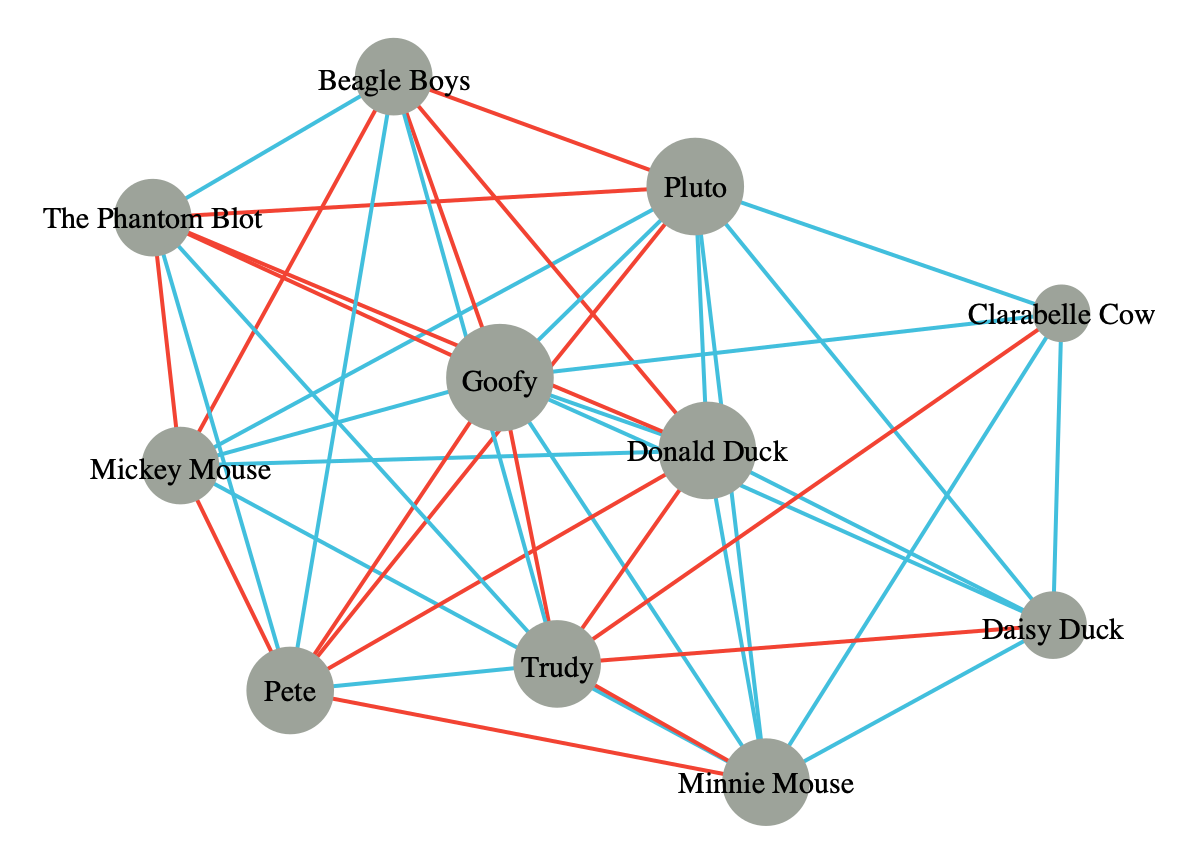

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x28b88ea90, at 0x10a933210>

In [117]:
gt.graph_draw(g,
              vertex_text = g.vp.node_id, 
              edge_color = g.ep.color, 
              vertex_size = deg,
              edge_pen_width = 2,
              vertex_text_position = -.5,
              vertex_font_size = 15,
              vertex_fill_color = '#9DA39A', 
              vertex_color = '#9DA39A')

In [260]:
g.add_edge_list(edge_list )

#add weights as an edge propetyMap
g.ep['weight'] = g.new_edge_property(value_type = "double", vals = weights)

In [267]:
# node properties that can be useful

g.vp["node_id"] = g.new_vertex_property(value_type = "string", vals = nodes)

g.ep['color'] = g.new_edge_property(value_type="string", vals = ['#42BFDD' if w > 0 else '#F24333' for w in weights ])

g.list_properties()

node_id        (vertex)  (type: string)
color          (edge)    (type: string)
weight         (edge)    (type: double)


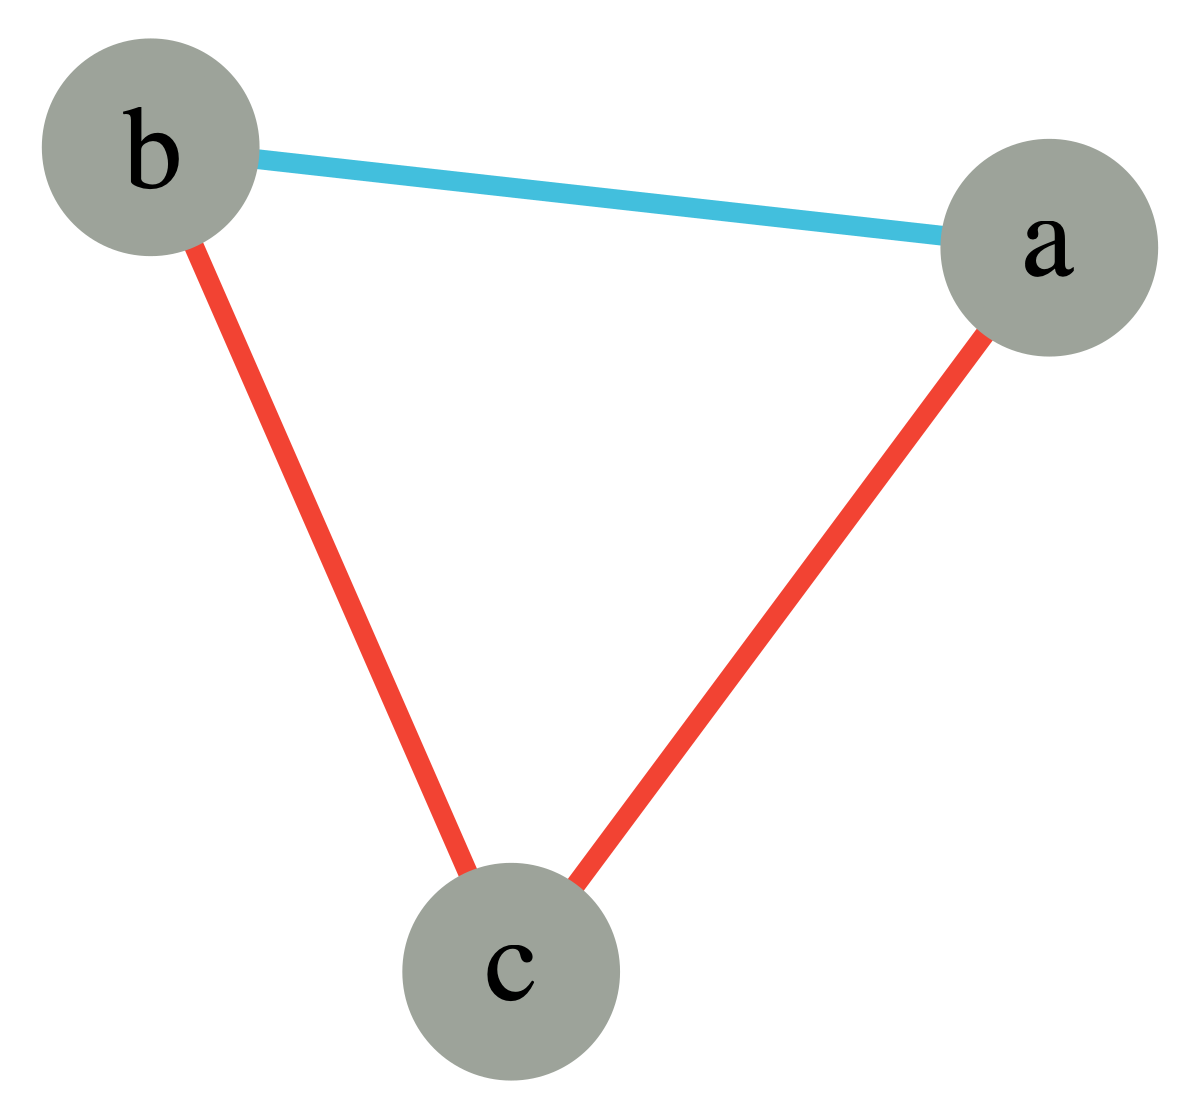

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x160387490, at 0x1604b36d0>

In [282]:
gt.graph_draw(g, vertex_text = g.vp.node_id, 
              edge_color = g.ep.color, 
              vertex_fill_color = '#9DA39A', 
              vertex_color = '#9DA39A')

In [243]:
print(list(g.vp.node_id))
print(list(g.ep.weight))

['a', 'b', 'c']
[1.0, -1.0, -1.0]


In [244]:
for v in g.vertices():
    print(g.vp.node_id[v])

a
b
c


In [245]:
gt.adjacency(g, weight = g.ep.weight).todense()

matrix([[ 0.,  1., -1.],
        [ 1.,  0., -1.],
        [-1., -1.,  0.]])

In [92]:
def to_graph_tool(adj):
    g = gt.Graph(directed=False)
    edge_weights = g.new_edge_property('double')
    g.edge_properties['weight'] = edge_weights
    nnz = np.nonzero(np.triu(adj,1))
    nedges = len(nnz[0])
    g.add_edge_list(np.hstack([np.transpose(nnz),np.reshape(adj[nnz],(nedges,1))]),eprops=[edge_weights])
    return g

In [93]:
x = to_graph_tool(A)
gt.adjacency(x, weight = x.ep.weight).todense()

matrix([[ 0.,  1., -1.],
        [ 1.,  0., -1.],
        [-1., -1.,  0.]])

In [ ]:
g = gt.Graph(directed=True)
adj = np.random.randint(-1, 2, (10, 10))
g.add_edge_list(np.transpose(A.nonzero()))

In [23]:
A[A.nonzero()]

array([ 1, -1,  1])

In [20]:
A

array([[ 0,  1,  0],
       [ 0,  0, -1],
       [ 0,  1,  0]])

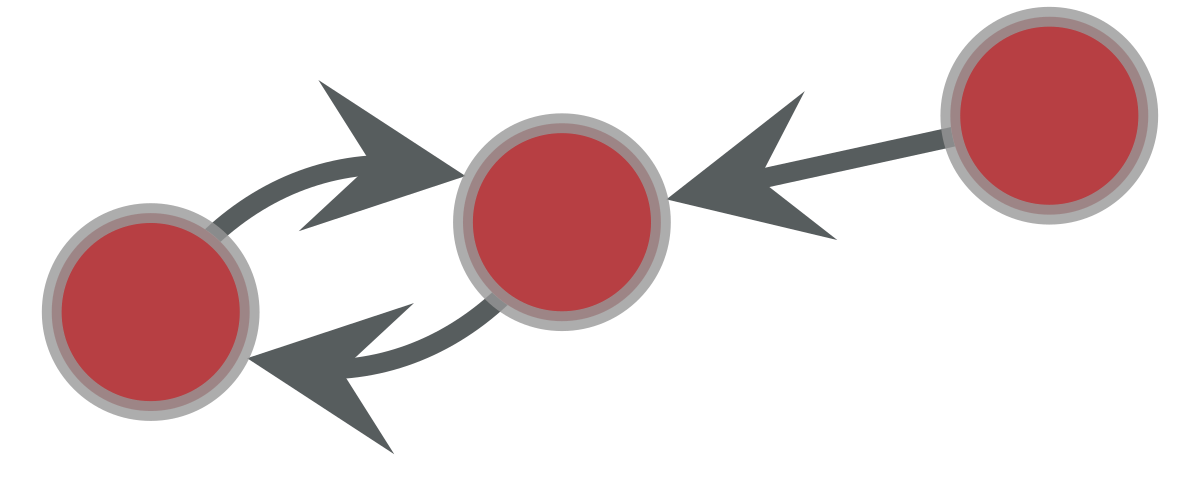

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x14b6ce290, at 0x14b6c7a50>

In [16]:
gt.graph_draw(g)